In [1]:
#IMPORTS

import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from scipy.stats import iqr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#USING CROSS VALIDATION
from sklearn.model_selection import cross_val_score

# Descrição dos atributos

artist name - nome do artista que produziu a musica

track name - nome da musica

Popularity = valor que representa a popularidade da musica entre 0 a 100

danceability = metrica que avalia o quão dancável a música é entre 0 a 100

energy = metrica que avalia o quão energética a música é entre 0 e 1

key = nota musical estimada para cálculo da escala da musica entre 1 e 11

loudness = métrica que avalia o quão barulhenta a música é (decibeis, pode ser negativo)

mode = modalidade da musica (binario- major ou minor)

speechiness = quantidade de discurso na musica 0 a 1

acousticness = acustica da musica - 0 a 1

instrumentalness = metrica para avaliar a presenca de instrumentos musicais na musica (0 a 1)

liveness = métrica que avalia a presenca de audiencia na musica (0 a 1)

valence = metrica que avalia a felicidade da musica (0 a 1)

tempo = ritmo da musica (valor positivo 0+)

duration = duração da musica (valor positivo)

time_signature = estimativa de batidas presentes na musica (valor positivo) 

Class = </br>
    # 0 - Acoustic/Folk </br>
    # 1 - Alt music  </br>
    # 2 - Blues </br>
    # 3 - Bollywood </br>
    # 4 - Country </br>
    # 5 - Hip Hop </br>
    # 6 - Indie </br>
    # 7 - Instrumental </br>
    # 8 - Metal </br>
    # 9 - Pop </br>
    # 10 - Rock

In [2]:
#carregar o Dataset
music_train = pd.read_csv("train.csv", encoding = 'unicode_escape', engine ='python')
music_test = pd.read_csv("test.csv", encoding = 'unicode_escape', engine ='python')

In [3]:
music_train.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [4]:
music_train.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [5]:
# Remove a coluna "Track Name"
music_train = music_train.drop(['Track Name'],axis=1)
music_test = music_test.drop(['Track Name'],axis=1)

In [6]:
# Remove duplicados
music_train = music_train.drop_duplicates()
music_test = music_test.drop_duplicates()

In [7]:
music_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17956 entries, 0 to 17995
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17956 non-null  object 
 1   Popularity          17528 non-null  float64
 2   danceability        17956 non-null  float64
 3   energy              17956 non-null  float64
 4   key                 15946 non-null  float64
 5   loudness            17956 non-null  float64
 6   mode                17956 non-null  int64  
 7   speechiness         17956 non-null  float64
 8   acousticness        17956 non-null  float64
 9   instrumentalness    13589 non-null  float64
 10  liveness            17956 non-null  float64
 11  valence             17956 non-null  float64
 12  tempo               17956 non-null  float64
 13  duration_in min/ms  17956 non-null  float64
 14  time_signature      17956 non-null  int64  
 15  Class               17956 non-null  int64  
dtypes: f

In [8]:
music_train.isna().sum()

Artist Name              0
Popularity             428
danceability             0
energy                   0
key                   2010
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4367
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

# Podemos verificar imediatamente alguns problemas do nosso dataset:

    - Existem métricas cuja escala é de 0 a 100 e outras que a escala é de 0 a 1 -> Necessidade de normalizar dados
    
    - A duração da musica tem valores em minutos e em milisegundos -> Escolher uma unidade de tempo e uniformizar dados para essa mesma unidade
    
    - Nas colunas de Popularity, Key e Instrumentalness verifica-se a presença de valores nulos, sendo por isso necessário tratá-los

In [9]:
# Transformar a duração da música para minutos

def ms_to_min(duracao):
    if(duracao > 1000):
        return float(duracao / 60000.0)
    return duracao

music_train['Duracao'] = music_train['duration_in min/ms'].apply(ms_to_min)
music_test['Duracao']= music_test['duration_in min/ms'].apply(ms_to_min)

music_train = music_train.drop(['duration_in min/ms'], axis=1)
music_test = music_test.drop(['duration_in min/ms'], axis=1)

music_train.head()

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Class,Duracao
0,Bruno Mars,60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,4,5,3.909933
1,Boston,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,4,10,4.195550
2,The Raincoats,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,4,6,1.827783
3,Deno,66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,4,5,2.899467
4,Red Hot Chili Peppers,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,4,10,3.832667


In [10]:
# Preencher os valores nulos 

# Usar o próximo valor
music_train['key'] = music_train['key'].fillna(method = 'bfill')
#music_train['instrumentalness'] = music_train['instrumentalness'].fillna(method = 'bfill')

# Realizar a interpolação
#music_train['Popularity'] = music_train['Popularity'].interpolate(method='linear', limit_direction = 'forward')
#music_train['Popularity'] = music_train['Popularity'].interpolate(method='spline', order=3)
#music_train['Popularity'] = music_train['Popularity'].interpolate(method='polynomial', order=2)

#Sustituir pela media
#music_train['instrumentalness'] = music_train['instrumentalness'].fillna(value=music_train['instrumentalness'].mean())

# Usar o próximo valor
#music_test['key'] = music_test['key'].fillna(method = 'bfill')
#music_test['instrumentalness'] = music_test['instrumentalness'].fillna(method = 'bfill')

# Realizar a interpolação
#music_test['Popularity'] = music_test['Popularity'].interpolate(method='linear', limit_direction = 'forward')
#music_test['Popularity'] = music_test['Popularity'].interpolate(method='spline', order=3)
#music_test['Popularity'] = music_test['Popularity'].interpolate(method='polynomial', order=2)

#Sustituir pela media
music_train['instrumentalness'] = music_train['instrumentalness'].fillna(value=music_train['instrumentalness'].mean())
music_train['Popularity'] = music_train['Popularity'].fillna(value=music_train['Popularity'].mean())

#music_train = music_train.fillna(value = 0)
#music_test = music_test.fillna(value = 0)

music_train.isna().sum()

Artist Name         0
Popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
Class               0
Duracao             0
dtype: int64

<AxesSubplot:>

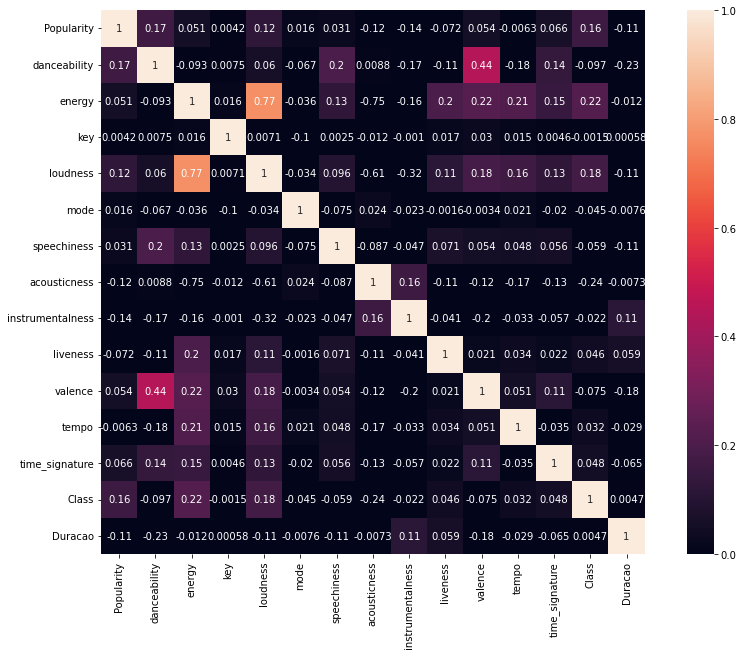

In [11]:
corr_matrix= music_train.corr()
f, ax =plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix,vmin=0,vmax=1,square=True,annot=True)

# Analise da matriz de correlacao

Através da matriz de correlação, percebe-se que as colunas de Energy e Loudness estão bastante correlaciondas (0,77)
Antes de remover uma dessas colunas, deve-se testar a imporância de cada uma destas para a previsão do resultado final

In [12]:
#_=sns.pairplot(music_train,hue='Class',height=1.5)

# Outlieres: 
Popularity : 41
danceability : 31
energy : 0
key : 0
loudness : 817
speechiness : 2032
acousticness : 0
instrumentalness : 2588
liveness : 951
valence : 0
tempo : 36
Duracao : 916


{'whiskers': [<matplotlib.lines.Line2D at 0x213dfdf8b50>,
 'caps': [<matplotlib.lines.Line2D at 0x213dfe042b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x213dfdf87c0>],
 'medians': [<matplotlib.lines.Line2D at 0x213dfe049d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x213dfe04d60>],
 'means': []}

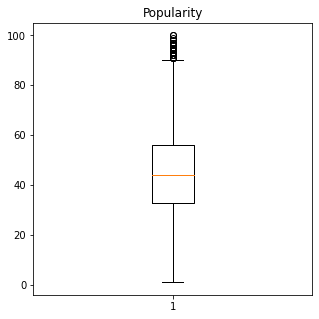

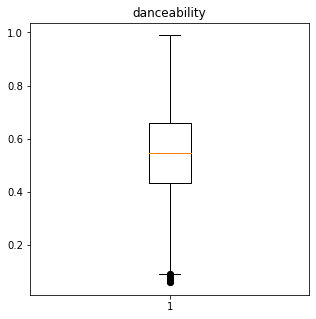

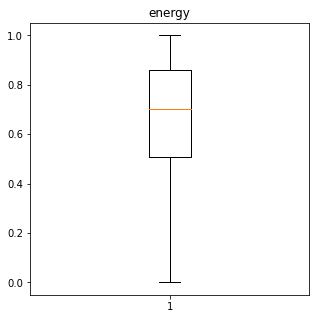

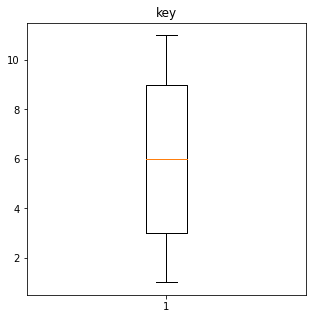

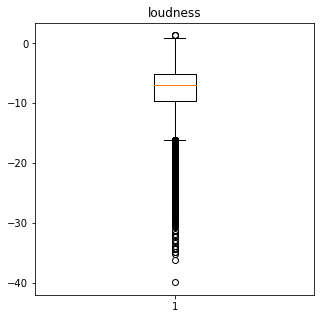

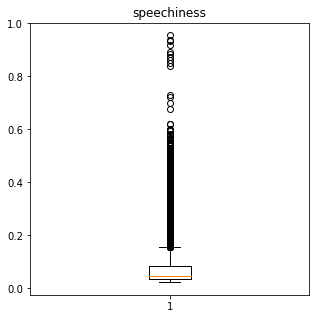

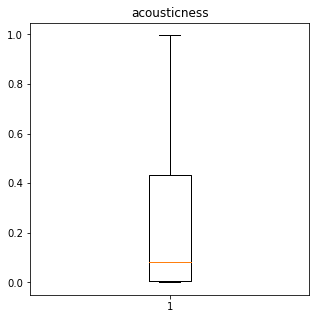

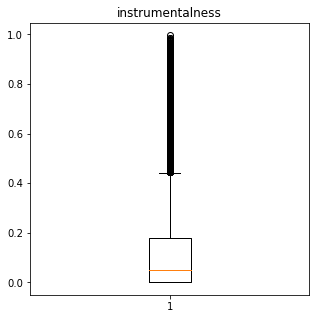

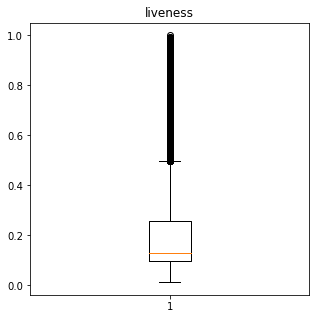

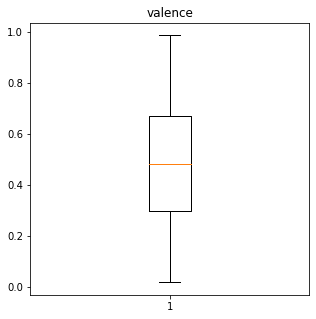

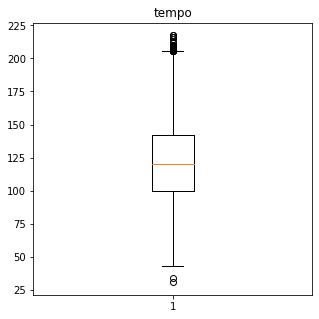

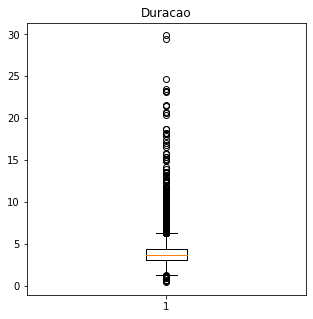

In [13]:
#Outlier Detection


columns = music_train.columns
num = [col for col in columns if (music_train[col].dtype == 'int') | (music_train[col].dtype == 'float')]

#IQR * 1.5
def outlier_detector(df):
    Q1, Q3 = df.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    min_bound, max_bound = Q1 - IQR * 1.5, Q3 + IQR * 1.5
    df_idx = df.loc[(df < min_bound) | (df > max_bound)].index
    return df_idx
print('# Outlieres: ')
for col_ in num:
    print(col_,':', len(outlier_detector(music_train[col_])))


#Box-plot
plt.figure(figsize = (5,5))
plt.title('Popularity')
plt.boxplot(music_train['Popularity'])

plt.figure(figsize = (5,5))
plt.title('danceability')
plt.boxplot(music_train['danceability'])

plt.figure(figsize = (5,5))
plt.title('energy')
plt.boxplot(music_train['energy'])

plt.figure(figsize = (5,5))
plt.title('key')
plt.boxplot(music_train['key'])

plt.figure(figsize = (5,5))
plt.title('loudness')
plt.boxplot(music_train['loudness'])

plt.figure(figsize = (5,5))
plt.title('speechiness')
plt.boxplot(music_train['speechiness'])

plt.figure(figsize = (5,5))
plt.title('acousticness')
plt.boxplot(music_train['acousticness'])

plt.figure(figsize = (5,5))
plt.title('instrumentalness')
plt.boxplot(music_train['instrumentalness'])

plt.figure(figsize = (5,5))
plt.title('liveness')
plt.boxplot(music_train['liveness'])

plt.figure(figsize = (5,5))
plt.title('valence')
plt.boxplot(music_train['valence'])

plt.figure(figsize = (5,5))
plt.title('tempo')
plt.boxplot(music_train['tempo'])

plt.figure(figsize = (5,5))
plt.title('Duracao')
plt.boxplot(music_train['Duracao'])

In [14]:
# Corregir o tipo de dados do nome do artista
music_train['Artist Name'] = music_train['Artist Name'].astype(str)
music_test['Artist Name'] = music_test['Artist Name'].astype(str)

# Initializing Encoder
number = preprocessing.LabelEncoder()

# Encoding
music_train["Artist Name"] = number.fit_transform(music_train["Artist Name"])
music_test["Artist Name"] = number.fit_transform(music_test["Artist Name"])

music_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17956 entries, 0 to 17995
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist Name       17956 non-null  int32  
 1   Popularity        17956 non-null  float64
 2   danceability      17956 non-null  float64
 3   energy            17956 non-null  float64
 4   key               17956 non-null  float64
 5   loudness          17956 non-null  float64
 6   mode              17956 non-null  int64  
 7   speechiness       17956 non-null  float64
 8   acousticness      17956 non-null  float64
 9   instrumentalness  17956 non-null  float64
 10  liveness          17956 non-null  float64
 11  valence           17956 non-null  float64
 12  tempo             17956 non-null  float64
 13  time_signature    17956 non-null  int64  
 14  Class             17956 non-null  int64  
 15  Duracao           17956 non-null  float64
dtypes: float64(12), int32(1), int64(3)
memor

In [15]:
# Scaler
from sklearn.preprocessing import MinMaxScaler

X = music_train.drop(['Class'],axis=1)
X_test = music_test
Y = music_train['Class'].to_frame()

scaler_x = MinMaxScaler(feature_range=(-1,1)).fit(X)
scaler_x_test = MinMaxScaler(feature_range=(-1,1)).fit(X_test)

x_scaled = pd.DataFrame(scaler_x.transform(X[X.columns]), columns=X.columns)
x_test_scaled = pd.DataFrame(scaler_x_test.transform(X_test[X_test.columns]), columns=X_test.columns)

x_scaled.describe()

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Duracao
count,17956.000000,17956.000000,17956.000000,17956.000000,1.795600e+04,17956.000000,17956.000000,17956.000000,17956.000000,17956.000000,17956.000000,17956.000000,17956.000000,17956.000000,17956.000000
mean,0.001406,-0.121499,0.041353,0.325457,-1.255291e-02,0.551391,0.273223,-0.877276,-0.503777,-0.643057,-0.627099,-0.033159,-0.014622,0.462046,-0.760028
std,0.579530,0.347676,0.357764,0.470808,6.401098e-01,0.196162,0.961977,0.179233,0.623868,0.531368,0.322210,0.496408,0.316437,0.180871,0.096024
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.501749,-0.353535,-0.198623,0.017980,-6.000000e-01,0.472571,-1.000000,-0.973619,-0.991365,-0.999412,-0.826738,-0.423995,-0.260780,0.500000,-0.814314
50%,0.002186,-0.131313,0.045621,0.399988,2.220446e-16,0.594790,1.000000,-0.946595,-0.836546,-0.899299,-0.762979,-0.044745,-0.041989,0.500000,-0.777751
75%,0.513391,0.111111,0.289864,0.719994,6.000000e-01,0.683250,1.000000,-0.870188,-0.128514,-0.643057,-0.501872,0.351039,0.192474,0.500000,-0.729100
max,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# # Algoritmos

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler

RANDOM_SEED = 2021

print('TensorFlow version: ',tf.__version__)

TensorFlow version:  2.3.0


In [17]:
x_scaled.shape

(17956, 15)

In [18]:
def build_model(activation='relu', learning_rate=0.01):
    model=Sequential()
    model.add(Flatten(input_shape=(15,)))
    model.add(Dense(15, activation=activation))
    #model.add(Dense(16,activation=activation))
    model.add(Dense(11, activation='softmax'))
    
    model.compile(
        loss = 'sparse_categorical_crossentropy',
        optimizer = tf.optimizers.Adam(learning_rate),
        metrics = ['accuracy'])
    return model

In [19]:
model = build_model()

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 15)                0         
_________________________________________________________________
dense (Dense)                (None, 15)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 11)                176       
Total params: 416
Trainable params: 416
Non-trainable params: 0
_________________________________________________________________


In [21]:
TUNING_DICT = {
    'activation' : ['relu','sigmoid'],
    'learning_rate' : [0.1,0.01,0.001]
}

In [22]:
kf = KFold(n_splits=5,shuffle=True, random_state=RANDOM_SEED)

model = KerasClassifier(build_fn=build_model, epochs=50, batch_size=32)
grid_search = GridSearchCV(estimator = model,
                          param_grid=TUNING_DICT,
                          cv = kf,
                          scoring = 'accuracy',
                          refit = 'True',
                          verbose = 1)

grid_search.fit(x_scaled,Y, validation_split=0.2, verbose=1)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Epoch 1/50
360/360 [==============================] - 0s 1ms/step - loss: 1.7968 - accuracy: 0.3378 - val_loss: 1.7704 - val_accuracy: 0.3425
Epoch 2/50
360/360 [==============================] - 0s 730us/step - loss: 1.7475 - accuracy: 0.3602 - val_loss: 1.7455 - val_accuracy: 0.3784
Epoch 3/50
360/360 [==============================] - 0s 801us/step - loss: 1.7603 - accuracy: 0.3620 - val_loss: 1.7395 - val_accuracy: 0.3571
Epoch 4/50
360/360 [==============================] - 0s 872us/step - loss: 1.7291 - accuracy: 0.3748 - val_loss: 1.8096 - val_accuracy: 0.3112
Epoch 5/50
360/360 [==============================] - 0s 961us/step - loss: 1.7382 - accuracy: 0.3645 - val_loss: 1.7648 - val_accuracy: 0.3634
Epoch 6/50
360/360 [==============================] - 0s 678us/step - loss: 1.7365 - accuracy: 0.3719 - val_loss: 1.7066 - val_accuracy: 0.3944
Epoch 7/50
360/360 [==============================] - 0s 887us/step - loss: 1.

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x00000213E4A36F10>,
             param_grid={'activation': ['relu', 'sigmoid'],
                         'learning_rate': [0.1, 0.01, 0.001]},
             refit='True', scoring='accuracy', verbose=1)

In [24]:
print('Best: %f using %s' % (grid_search.best_score_,grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params=grid_search.cv_results_['params']
for mean, stdev, param in zip(means,stds,params):
    print("%f (%f) with %r" % (mean,stdev, param))

Best: 0.461963 using {'activation': 'sigmoid', 'learning_rate': 0.01}
0.350080 (0.021311) with {'activation': 'relu', 'learning_rate': 0.1}
0.457173 (0.005305) with {'activation': 'relu', 'learning_rate': 0.01}
0.456059 (0.007157) with {'activation': 'relu', 'learning_rate': 0.001}
0.436735 (0.010223) with {'activation': 'sigmoid', 'learning_rate': 0.1}
0.461963 (0.008817) with {'activation': 'sigmoid', 'learning_rate': 0.01}
0.447316 (0.008994) with {'activation': 'sigmoid', 'learning_rate': 0.001}
